# Predicting Booking Cancelation

#### Machine Learning for Marketing

From the dataset and challenge available at: https://www.kaggle.com/jessemostipak/hotel-booking-demand

2021

# I. Business Understanding

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

# II. Data Understanding

## Dataset Description

- <b>hotel:</b> hotel location
- <b>is_canceled:</b> [prediction variable] if the booking was or not is_canceled
- <b>lead_time:</b> Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- <b>arrival_date_year:</b> year of the arrival
- <b>arrival_date_month:</b> month of the arrival
- <b>arrival_date_week_number</b> week number of the arrival (1 to 53)
- <b>arrival_date_day_of_month:</b> day of the month of the arrival
- <b>stays_in_weekend_nights:</b>
- <b>stays_in_week_nights</b>
- <b>adults:</b> total of adult guests
- <b>children:</b> total of children guests
- <b>babies:</b> total of babies guests
- <b>meal:</b> type of meals included in the booking (SC and undefined to no meal selected)
- <b>country:</b> coutntry of the guest origin
- <b>market_segment:</b> Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- <b>distribution_channel:</b> Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- <b>is_repeated_guest:</b> Value indicating if the booking name was from a repeated guest (1) or not (0)
- <b>previous_cancellations:</b> Number of previous bookings that were cancelled by the customer prior to the current booking
- <b>previous_bookings_not_canceled:</b> Number of previous bookings not cancelled by the customer prior to the current booking
- <b>reserved_room_type:</b> Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- <b>assigned_room_type:</b> Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- <b>booking_changes:</b> Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- <b>deposity_type:</b> Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- <b>agent:</b> ID of the travel agency that made the booking
- <b>company:</b> ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- <b>days_in_waiting_list:</b> Number of days the booking was in the waiting list before it was confirmed to the customer
- <b>customer_type:</b> Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.
- <b>adr:</b> Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- <b>required_car_parking:</b> Number of car parking spaces required by the customer
- <b>total_of_special_requests:</b> Number of special requests made by the customer (e.g. twin bed or high floor)
- <b>reservation_status:</b> Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
- <b>reservation_status_date:</b> Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

## II.a Load and Describe the Data

In [2]:
# Importing Data Exploration and Preparation Libraries

import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [3]:
# Dataset URL in GitHub
url = 'https://raw.githubusercontent.com/nickolaslago/DataScience4Marketing/093ec3040bda53e7b983096de4bdf86bf320b736/AAeM/Final%20Project/hotel_bookings.csv'
# Adding the Dataset to a DataFrame
df = pd.read_csv(url, error_bad_lines=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390,NaN,NaN,NaN,0.370416,0.482918,0,0,0,1,1
lead_time,119390,NaN,NaN,NaN,104.011,106.863,0,18,69,160,737
arrival_date_year,119390,NaN,NaN,NaN,2016.16,0.707476,2015,2016,2016,2017,2017
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390,NaN,NaN,NaN,27.1652,13.6051,1,16,28,38,53
arrival_date_day_of_month,119390,NaN,NaN,NaN,15.7982,8.78083,1,8,16,23,31
stays_in_weekend_nights,119390,NaN,NaN,NaN,0.927599,0.998613,0,0,1,2,19
stays_in_week_nights,119390,NaN,NaN,NaN,2.5003,1.90829,0,1,2,3,50
adults,119390,NaN,NaN,NaN,1.8564,0.579261,0,2,2,2,55


In [6]:
# Checking for missing values

null = pd.DataFrame({'Missing Values' : df.isna().sum(), 'Percentage Missing Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Missing Values,Percentage Missing Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


## II.b Numerical Variables

### Values Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9d8cba6d0>,
      dtype=object)

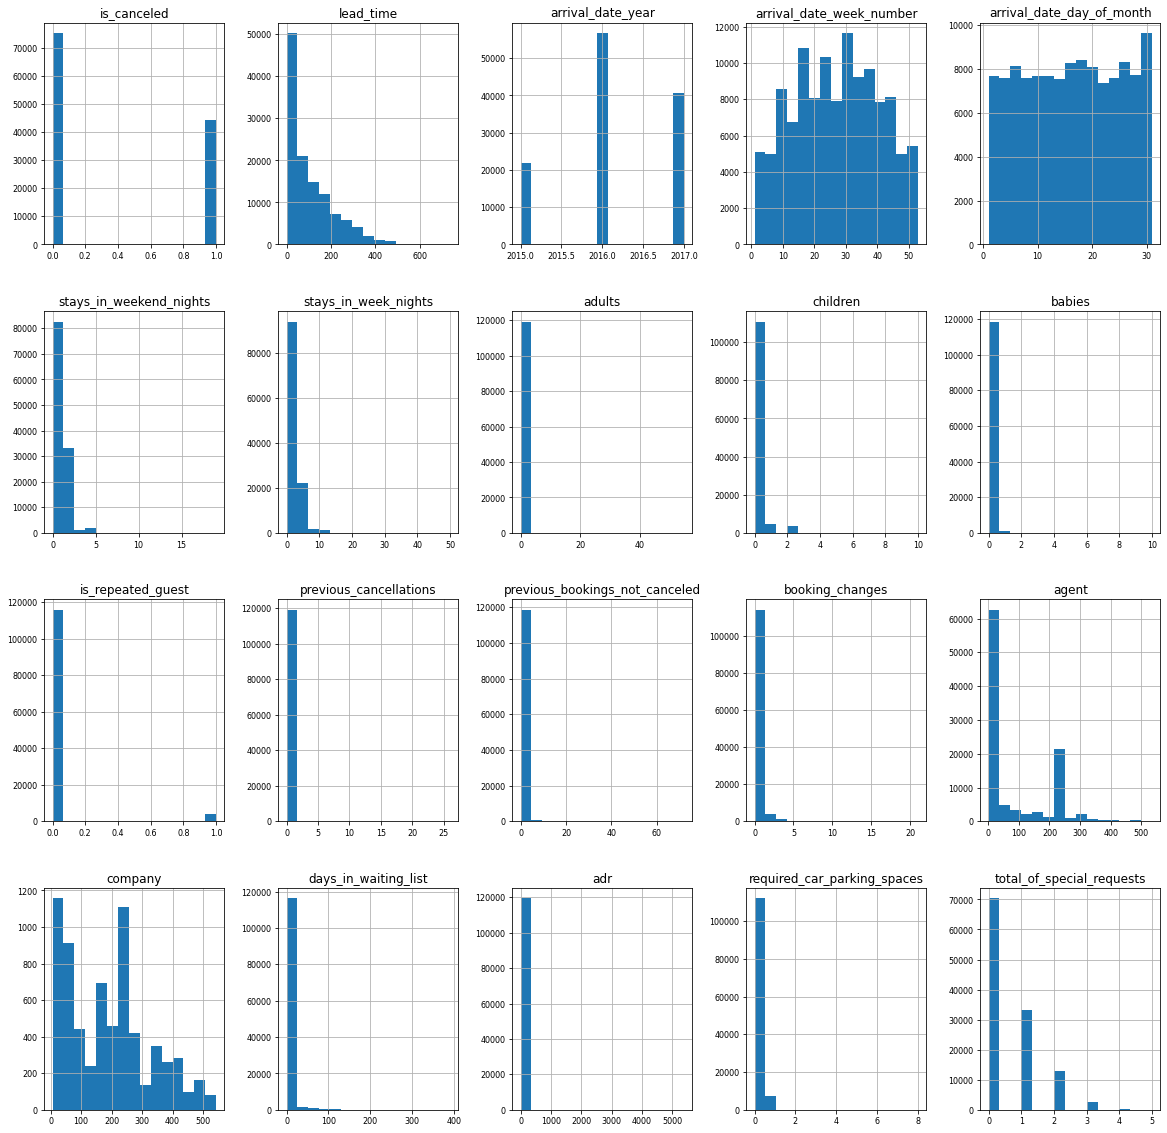

In [7]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(20, 20), layout=(4, 5), xlabelsize=8, ylabelsize=8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

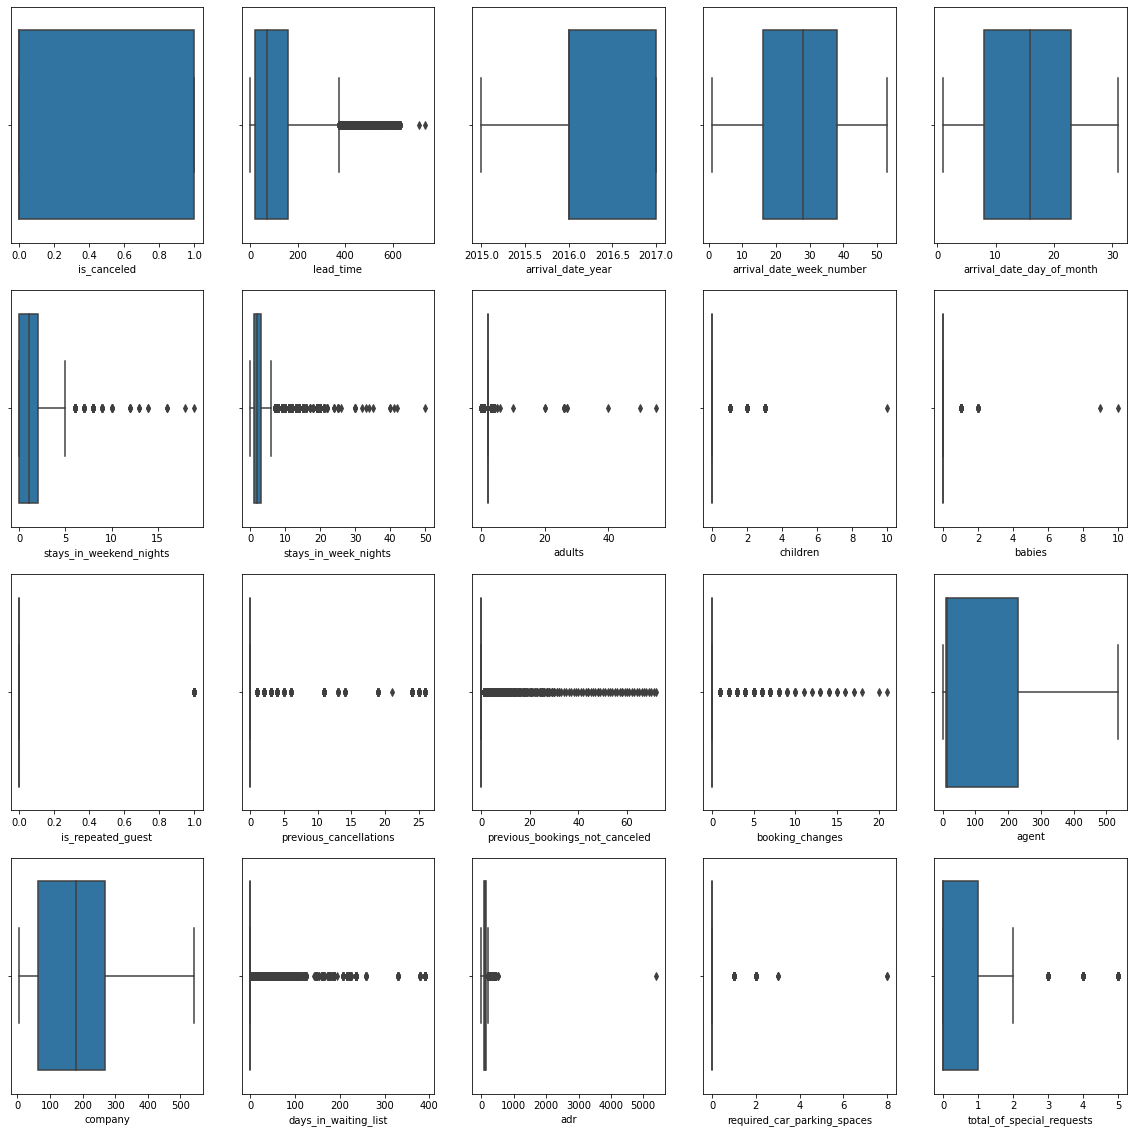

In [8]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(4, 5, figsize=(20, 20))
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

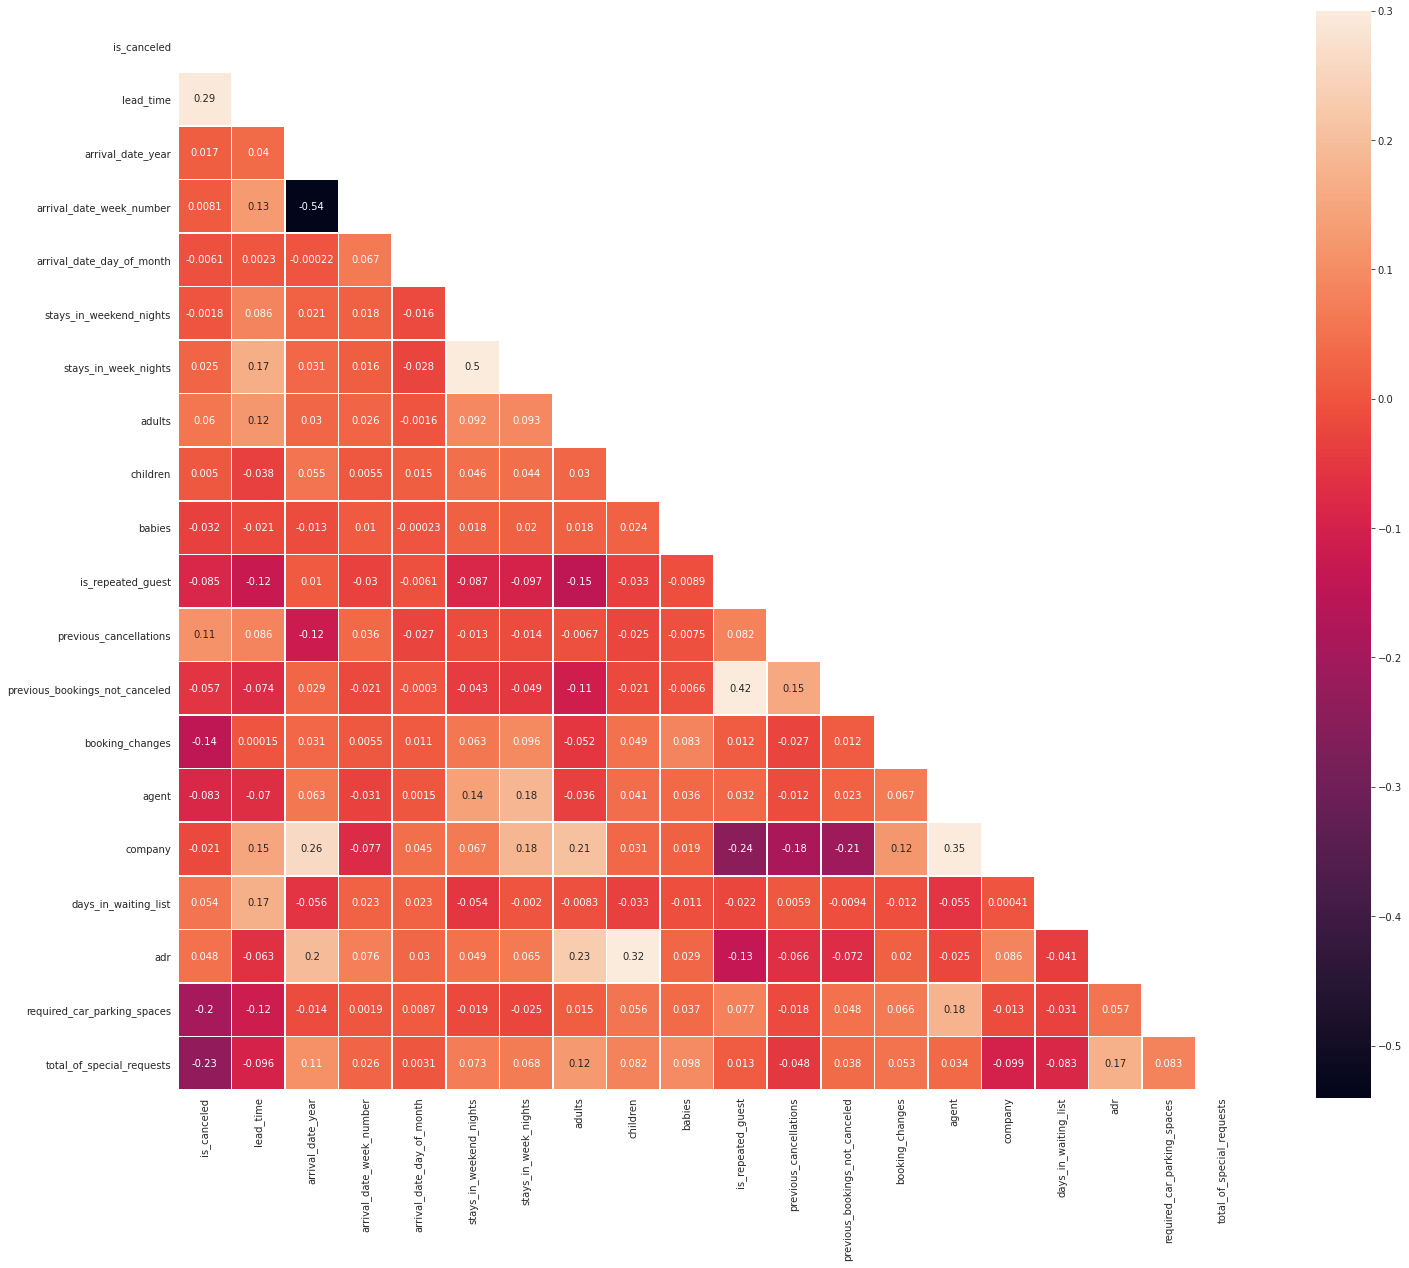

In [9]:
corr = df[numerical].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(24,20))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, linewidths=.5)

In [10]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

## II.c Categorical Variables

In [11]:
df.describe(include="object").T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


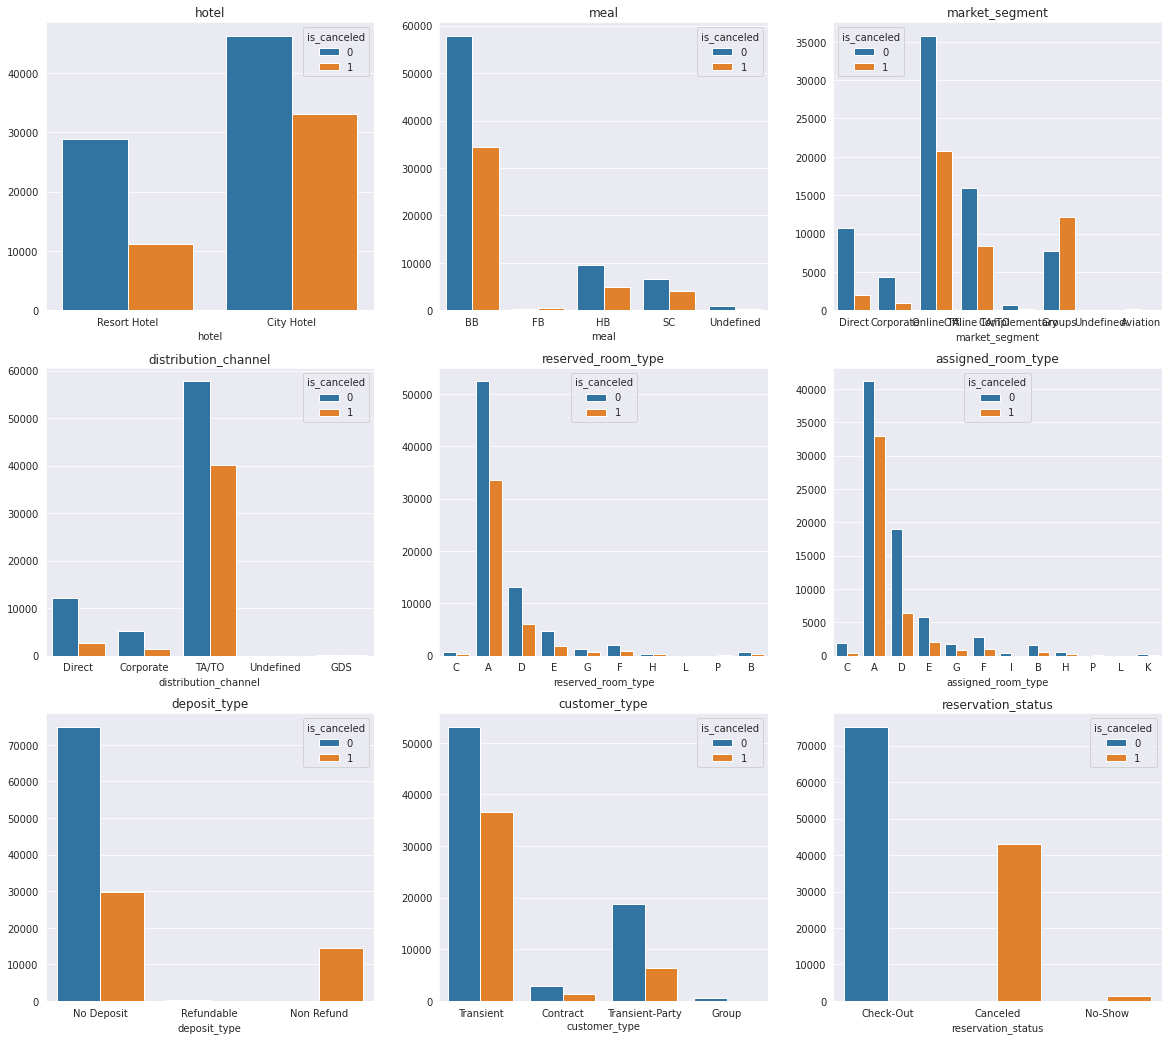

In [12]:
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,18))

sns.countplot(data=df, x='hotel', hue="is_canceled", ax=axes[0][0]).set(ylabel=None);
sns.countplot(data=df, x='meal', hue="is_canceled", ax=axes[0][1]).set(ylabel=None);
sns.countplot(data=df, x='market_segment', hue="is_canceled", ax=axes[0][2]).set(ylabel=None);
sns.countplot(data=df, x='distribution_channel', hue="is_canceled", ax=axes[1][0]).set(ylabel=None);
sns.countplot(data=df, x='reserved_room_type', hue="is_canceled", ax=axes[1][1]).set(ylabel=None);
sns.countplot(data=df, x='assigned_room_type', hue="is_canceled", ax=axes[1][2]).set(ylabel=None);
sns.countplot(data=df, x='deposit_type', hue="is_canceled", ax=axes[2][0]).set(ylabel=None);
sns.countplot(data=df, x='customer_type', hue="is_canceled", ax=axes[2][1]).set(ylabel=None);
sns.countplot(data=df, x='reservation_status', hue="is_canceled", ax=axes[2][2]).set(ylabel=None);

axes[0][0].set(title='hotel');
axes[0][1].set(title='meal');
axes[0][2].set(title='market_segment');
axes[1][0].set(title='distribution_channel');
axes[1][1].set(title='reserved_room_type');
axes[1][2].set(title='assigned_room_type');
axes[2][0].set(title='deposit_type');
axes[2][1].set(title='customer_type');
axes[2][2].set(title='reservation_status');

plt.show();

In [13]:
# creating numerical and categorical dataframes
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_df = df[cat_cols]

# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA

# III. Data Preparation

In [14]:
# Copying the dataframe to a new prepared one
df_prep = df.copy(deep=True);

In [15]:
# Droping useless variables
# By just looking at the data at first, it was already possible to identify columns that won't have usage for us later.

preCleaningCols = ['country', 'reservation_status', 'reservation_status_date', 'market_segment']
df_prep = df_prep.drop(preCleaningCols, axis=1)

In [16]:
# Creating easy columns that can help us later
df_prep['children'] = df_prep['children'].fillna(0)
df_prep['total_guest'] = df_prep['adults'] + df_prep['children'] + df_prep['babies']

## III.a Inconsistences

In [17]:
# Finding bookings without guesses. Form some reason there are some values in the dataFrame.
filterGuest = (df_prep.total_guest == 0)

# Cleaning records without guesses
df_prep = df_prep[~filterGuest]

## III.b Categorical Columns Encoding and Indexing

In [18]:
# Transforming Month to Numerical
df_prep['arrival_date_month'] = df_prep['arrival_date_month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})
df_prep['hotel'] = df_prep['hotel'].map({'City Hotel': 1, 'Resort Hotel': 0})
df_prep['meal'] = df_prep['meal'].map({'BB': 1, 'FB': 1, 'HB': 1, 'SC': 0, 'Undefined': 0})

# AQUI 
df_prep['distribution_channel'] = df_prep['distribution_channel'].map({'Direct': 1, 'Corporate': 1, 'TA/TO': 1, 'Undefined': 0, 'GDS': 1}) # TO DO

df_prep['reserved_room_type'] = df_prep['reserved_room_type'].apply(lambda x: 1 if x == "A" else 0)
df_prep['assigned_room_type'] = df_prep['assigned_room_type'].apply(lambda x: 1 if x == "A" else 0)
df_prep['deposit_type'] = df_prep['deposit_type'].apply(lambda x: 1 if x == "No Deposit" else 0)

# AQUI
df_prep['customer_type'] = df_prep['customer_type'].map({'Transient': 1, 'Contract': 1, 'Transient-Party': 1, 'Group': 0}) # TO DO

## III.a Missing Values and Outliers

### NaN: Agent and Company Bookings

We had already identified that there was missing values on the "agent" and "company" columns. There is because the some other bookings are made outside the scope of these two categories. In order to solve this outliers, we will create two new columns ["is_agent", "is_company"] that will return true or false for these variables.

In [19]:
# Filling NaN on Children by 0
df_prep['children'] = df_prep['children'].fillna(0)

In [20]:
# Binarying agent column
df_prep['is_agent'] = df_prep['agent'].apply(lambda x: 1 if x > 0 else 0)
# Binarying company column
df_prep['is_company'] = df_prep['company'].apply(lambda x: 1 if x > 0 else 0)

In [21]:
df_prep.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16280
company                           112442
days_in_waiting_list                   0
customer_type   

### Outliers

In [22]:
leadTimeCap = 650
stayInWeekendCap = 8
stayInWeekCap = 22
guestCap = 6
adrCap = 400
carCap = 2
# requestsCap = 4

df_prep = df_prep[df_prep["lead_time"] < leadTimeCap]
df_prep = df_prep[df_prep["stays_in_weekend_nights"] < stayInWeekendCap]
df_prep = df_prep[df_prep["stays_in_week_nights"] < stayInWeekCap]
df_prep = df_prep[df_prep["total_guest"] < guestCap]
df_prep = df_prep[df_prep["adr"] < adrCap]
df_prep = df_prep[df_prep["adr"] > 0]
df_prep = df_prep[df_prep["required_car_parking_spaces"] < carCap]
# df_prep = df_prep[df_prep["total_of_special_requests"] < requestsCap]

Setting Caps for some columns.

In order not to delete the values of some columns as outliers, we will set a cap, for example, everything above that value will become that cap value.

In [23]:
# Binarying Waiting List column
df_prep['is_waiting_list'] = df_prep['days_in_waiting_list'].apply(lambda x: 0 if x == 0 else 1)
# Binarying Special Request column
df_prep['is_special_request'] = df_prep['total_of_special_requests'].apply(lambda x: 1 if x > 0 else 0)
# Previous Cancelation: 0 / 1 / 2 [More than 1]
df_prep['previous_cancellations'] = df_prep['previous_cancellations'].apply(lambda x: 2 if x > 1 else x)
# Setting a cap for 'previous_bookings_not_canceled': 10
df_prep['previous_bookings_not_canceled'] = df_prep['previous_bookings_not_canceled'].apply(lambda x: 10 if x > 10 else x)
# Setting a cap for 'booking_changes': 5
df_prep['booking_changes'] = df_prep['booking_changes'].apply(lambda x: 5 if x > 4 else x)
# Setting a cap for 'booking_changes': 5
df_prep['lead_time'] = df_prep['lead_time'].apply(lambda x: 500 if x > 499 else x)

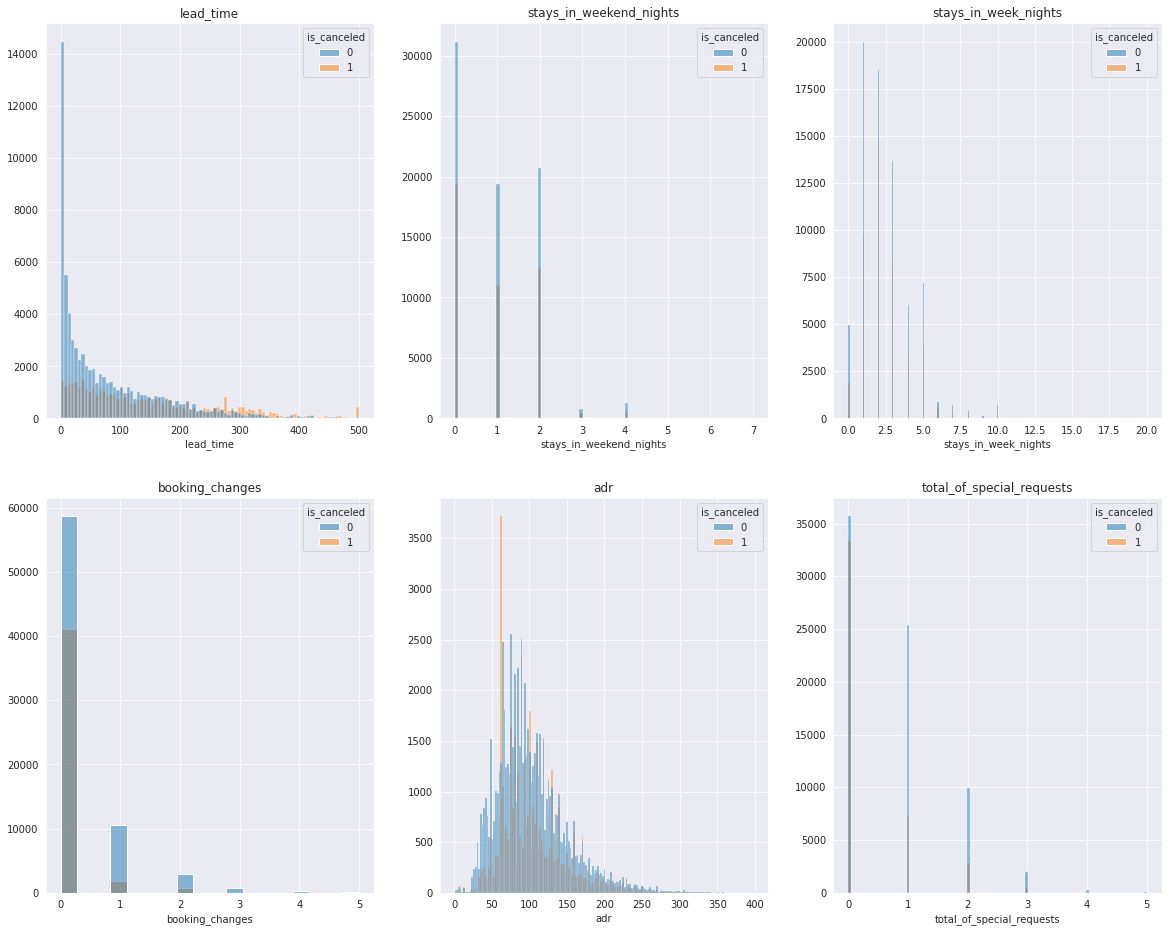

In [24]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,16))

sns.histplot(data=df_prep, x='lead_time', hue="is_canceled", ax=axes[0][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='stays_in_weekend_nights', hue="is_canceled", ax=axes[0][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='stays_in_week_nights', hue="is_canceled", ax=axes[0][2]).set(ylabel=None);
sns.histplot(data=df_prep, x='booking_changes', hue="is_canceled", ax=axes[1][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='adr', hue="is_canceled", ax=axes[1][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='total_of_special_requests', hue="is_canceled", ax=axes[1][2]).set(ylabel=None);

axes[0][0].set(title='lead_time');
axes[0][1].set(title='stays_in_weekend_nights');
axes[0][2].set(title='stays_in_week_nights');
axes[1][0].set(title='booking_changes');
axes[1][1].set(title='adr');
axes[1][2].set(title='total_of_special_requests');

plt.show();

In [25]:
df_prep['log_lead_time'] = np.log(df_prep['lead_time'] + 1)

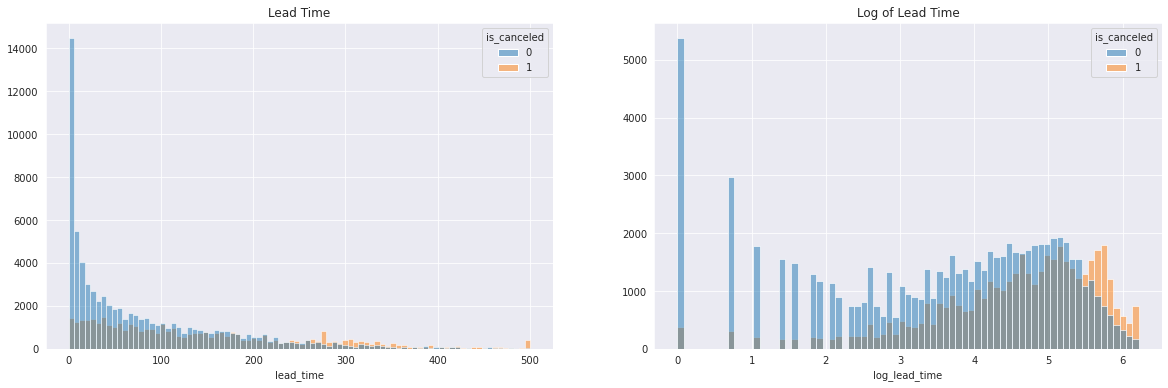

In [26]:
#Dealing with the distribuition of the Purchased habits
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))

sns.histplot(data=df_prep, x='lead_time', hue='is_canceled', ax=ax[0]).set(ylabel=None);
sns.histplot(data=df_prep, x='log_lead_time', hue='is_canceled', ax=ax[1]).set(ylabel=None);

ax[0].set(title='Lead Time');
ax[1].set(title='Log of Lead Time');

plt.show()

In [27]:
correlation = df_prep.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
deposit_type                      0.478209
log_lead_time                     0.317356
lead_time                         0.290948
is_special_request                0.267890
previous_cancellations            0.255673
total_of_special_requests         0.237294
required_car_parking_spaces       0.199076
assigned_room_type                0.195047
booking_changes                   0.151736
hotel                             0.137559
is_waiting_list                   0.099323
is_company                        0.097088
is_agent                          0.096973
agent                             0.082351
previous_bookings_not_canceled    0.081120
is_repeated_guest                 0.074457
reserved_room_type                0.069722
adults                            0.056617
days_in_waiting_list              0.054193
customer_type                     0.041918
total_guest                       0.040080
company                           0.034668
babies     

In [28]:
df_prep.shape[0]/df.shape[0]

0.9822681966663874

# IV. Modelling

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

## IV.a Data Partition

In [40]:
# Selecting columns to model
cols_to_model = ['deposit_type', 'log_lead_time', 'is_special_request', 'previous_cancellations', 'total_of_special_requests', 'required_car_parking_spaces', 'booking_changes', 'hotel', 'is_waiting_list']

# Creating a DataFrame for Modelling
X = df_prep[cols_to_model]
y = df_prep['is_canceled']

### Train, Test Split

In [41]:
# Importing the 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.30)

In [42]:
X_train.shape, X_test.shape

((82091, 9), (35182, 9))

## IV.b Data Normalization

In [43]:
# Dataframe for scaling
tempDF = X.copy(deep=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
X_train_scaled.shape, X_test_scaled.shape

((82091, 9), (35182, 9))

## IV.c Building the Models

### Logistic Regression

In [45]:
# Import LogisticRegression mode from sklearn
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression(random_state=123)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
conf = metrics.confusion_matrix(y_test, y_pred_lr)
clf_report = metrics.classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7632311977715878
Confusion Matrix : 
[[20935  1058]
 [ 7272  5917]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.95      0.83     21993
           1       0.85      0.45      0.59     13189

    accuracy                           0.76     35182
   macro avg       0.80      0.70      0.71     35182
weighted avg       0.78      0.76      0.74     35182



### K-Nearest Neighbors

In [47]:
# Import KNeighborsClassifier mode from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
conf = metrics.confusion_matrix(y_test, y_pred_knn)
clf_report = metrics.classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of Logistic Regression is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7576317435052016
Confusion Matrix : 
[[18974  3019]
 [ 5508  7681]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     21993
           1       0.72      0.58      0.64     13189

    accuracy                           0.76     35182
   macro avg       0.75      0.72      0.73     35182
weighted avg       0.75      0.76      0.75     35182



### Support Vector Machinhe

In [49]:
# Import KNeighborsClassifier mode from sklearn
from sklearn import svm

### Decision Tree

In [50]:
# Import Decision Tree Classifier
from sklearn import tree

In [60]:
treeClass = tree.DecisionTreeClassifier(max_depth=6, random_state=123)
treeClass.fit(X_train_scaled, y_train)

y_pred_tree = treeClass.predict(X_test_scaled)

acc_tree = metrics.accuracy_score(y_test, y_pred_tree)
conf = metrics.confusion_matrix(y_test, y_pred_tree)
clf_report = metrics.classification_report(y_test, y_pred_tree)

print(f"Accuracy Score of Decision Tree is : {acc_tree}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.7647376499346257
Confusion Matrix : 
[[21933    60]
 [ 8217  4972]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     21993
           1       0.99      0.38      0.55     13189

    accuracy                           0.76     35182
   macro avg       0.86      0.69      0.69     35182
weighted avg       0.83      0.76      0.73     35182

